# Feature Selection

In [1]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

import math
from numpy import mean 
from numpy import std
from numpy import percentile 
# from scipy.stats import iqr

## Plotting
import matplotlib.pyplot as plt

from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from matplotlib import pyplot

## What is feature selection ?

### 🌟 Core Concept: Feature Selection

🌟 **Core Concept: Feature Selection**
- Reduces number of input variables in a model.
- Aims to improve **computational efficiency** and **model performance**.
- Helps remove **irrelevant** or **redundant** data.

### 🧠 Types of Feature Selection

#### 🔹 Unsupervised

🔹 **Unsupervised**
- **Ignores** the target variable.
- Used for **data cleaning** (e.g., low variance, high correlation).

#### 🔹 Supervised

🔹 **Supervised**
- **Considers** the target variable.
- Subtypes:<br>
o	**Filter**: Uses statistics to score each input’s relationship with the target.<br>
o	**Wrapper**: Searches feature subsets based on model performance.<br>
o	**Intrinsic**: Feature selection built into the learning algorithm (e.g., Lasso, Decision Trees).

### 📊 Statistical Measures for **Filter Methods**

Selection depends on the data types of input/output variables:<br>
**✅ Numerical Input ➡️ Numerical Output (Regression)**
- Pearson’s Correlation (linear)
- Spearman’s Rank (non-linear)
- Mutual Information<br>
**✅ Numerical Input ➡️ Categorical Output (Classification)**<br>
- ANOVA F-test
- Kendall’s Tau (ordinal target)
- Mutual Information<br>
**✅ Categorical Input ➡️ Numerical Output (Regression)**<br>
- Reverse application of the above methods<br>
**✅ Categorical Input ➡️ Categorical Output (Classification)**<br>
- Chi-Squared Test
- Mutual Information

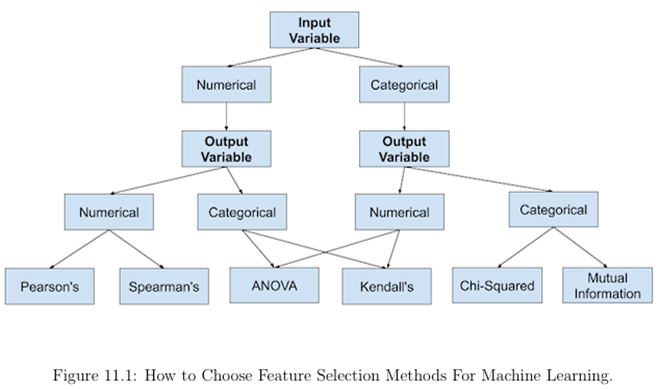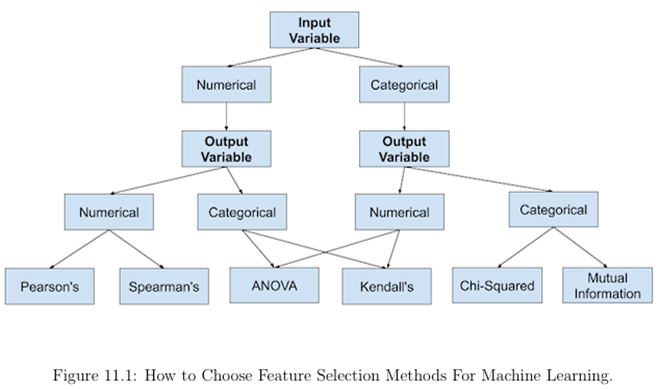

### 🔄 Handling Mixed Data Types (**Wrapper methods**)

🔄 Handling Mixed Data Types
- Use **ColumnTransformer** to apply suitable stats per variable type.
- **Wrapper methods** like:<br>
o	**Tree search** (e.g., best-first)<br>
o	**Stochastic search** (e.g., genetic algorithms)<br>
o	**Step-wise regression**, **RFE (Recursive Feature Elimination)**

### 🤖 Model-Based (**Intrinsic**) Feature Scoring

🤖 **Model-Based (Intrinsic) Feature Scoring** <br>
Use model’s built-in feature importance scores:
- **Decision Trees (CART)**
- **Random Forest**
- **Gradient Boosting**
- **Bagging Trees**


### ❓ Common Questions

- **How to filter?**<br>
o	SelectKBest, SelectPercentile from sklearn.
- **Adapting statistics to data types?**<br>
o	Try data transformations (e.g., binning numeric, ordering categoricals).
- **How to inspect selected features?**<br>
o	Apply selection method directly, inspect column indices/names.
- **Best method?**<br>
o	No universal best. Experiment and validate on your dataset.

### 🔍 Key Takeaways

🔍 **Key Takeaways**
- Supervised feature selection includes filter, wrapper, and intrinsic methods.
- Always choose statistical measures based on **input/output data types.**
- Validate methods **empirically** for each use case.

## How to Select Categorical Input Features (for Classification)

🧪 **Two Key Feature Selection Techniques**<br><br>
-	**Chi-Squared (χ²) Test**<br>
o	Measures independence between feature and target.<br>
o	**High score** → **strong relationship.**<br>
o	Used with **SelectKBest** in scikit-learn.<br><br>
-	**Mutual Information**<br>
o	Measures reduction in uncertainty of target given a feature.<br>
o	Captures non-linear relationships.<br>
o	Also used with **SelectKBest**.

### Chi-Squared (χ²) Test - Feature Selection

**Chi-Squared (χ²) Test**<br>
- Measures independence between feature and target.<br>
- **High score** → **strong relationship.**<br>
- Used with **SelectKBest** in scikit-learn.<br><br>

Feature: 0, Score: 0.4726
Feature: 1, Score: 0.0292
Feature: 2, Score: 2.1377
Feature: 3, Score: 29.3811
Feature: 4, Score: 8.2226
Feature: 5, Score: 8.1002
Feature: 6, Score: 1.2738
Feature: 7, Score: 0.9507
Feature: 8, Score: 3.7000


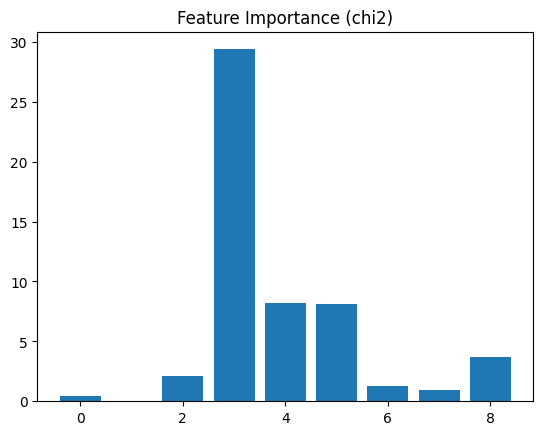

In [2]:
# example of chi squared feature selection for categorical data 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = pd.read_csv(filename, header=None)  
    # split into input and output variables
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]   
    # format all fields as string
    X = X.astype(str) 
    return X, y

# Prepare input data (encoding categorical variables)
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    
    # Keep column names
    X_train_enc = pd.DataFrame(oe.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_enc = pd.DataFrame(oe.transform(X_test), columns=X_test.columns, index=X_test.index)
    return X_train_enc, X_test_enc
    

# Prepare output labels
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_train_enc = pd.Series(le.transform(y_train), index=y_train.index)
    y_test_enc = pd.Series(le.transform(y_test), index=y_test.index)
    
    return y_train_enc, y_test_enc

# Feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    
    # Transform into DataFrames
    X_train_fs = pd.DataFrame(fs.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_fs = pd.DataFrame(fs.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_fs, X_test_fs, fs

# --- Main script ---

# Dataset path
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"

# Load
X, y = load_dataset(path)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Encode features and targets
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Print scores for features
for col, score in zip(X_train_enc.columns, fs.scores_):
    print(f'Feature: {col}, Score: {score:.4f}')

# Plot
# plt.figure(figsize=(10, 5))
plt.bar(X_train_enc.columns, fs.scores_)
# plt.xticks(rotation=45)
plt.title("Feature Importance (chi2)")
# plt.tight_layout()
plt.show()

### Mutual information - Feature Selection

**Mutual Information**<br>
- Measures reduction in uncertainty of target given a feature.<br>
- Captures non-linear relationships.<br>
- Also used with **SelectKBest**.

Feature: 0, Score: 0.0000
Feature: 1, Score: 0.0000
Feature: 2, Score: 0.0652
Feature: 3, Score: 0.0000
Feature: 4, Score: 0.0407
Feature: 5, Score: 0.0489
Feature: 6, Score: 0.0000
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0000


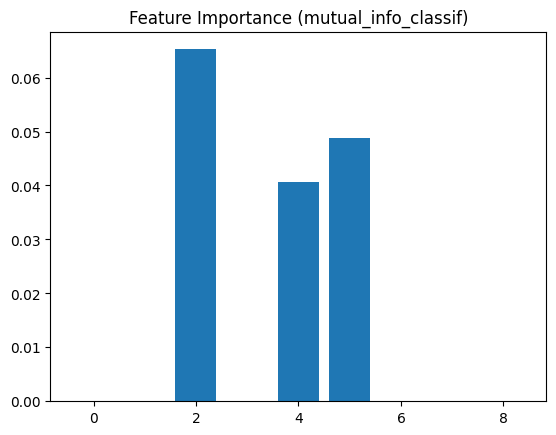

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from matplotlib import pyplot as plt

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    # format all fields as string
    X = X.astype(str) 
    return X, y

# Prepare input data (encoding categorical variables)
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    
    # Keep column names
    X_train_enc = pd.DataFrame(oe.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_enc = pd.DataFrame(oe.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_enc, X_test_enc

# Prepare output labels
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_train_enc = pd.Series(le.transform(y_train), index=y_train.index)
    y_test_enc = pd.Series(le.transform(y_test), index=y_test.index)
    
    return y_train_enc, y_test_enc

# Feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    
    # Transform into DataFrames
    X_train_fs = pd.DataFrame(fs.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_fs = pd.DataFrame(fs.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_fs, X_test_fs, fs

# --- Main script ---

# Dataset path
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"

# Load
X, y = load_dataset(path)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Encode features and targets
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Print scores for features
for col, score in zip(X_train_enc.columns, fs.scores_):
    print(f'Feature: {col}, Score: {score:.4f}')

# Plot
# plt.figure(figsize=(10, 5))
plt.bar(X_train_enc.columns, fs.scores_)
# plt.xticks(rotation=45)
plt.title("Feature Importance (mutual_info_classif)")
# plt.tight_layout()
plt.show()

### Modeling With Selected Features - Model Built Using All Features (Baseline)

In [4]:
#evaluation of a model using all input features 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    # format all fields as string
    X = X.astype(str) 
    return X, y

# Prepare input data (encoding categorical variables)
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    
    # Keep column names
    X_train_enc = pd.DataFrame(oe.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_enc = pd.DataFrame(oe.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_enc, X_test_enc

# Prepare output labels
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_train_enc = pd.Series(le.transform(y_train), index=y_train.index)
    y_test_enc = pd.Series(le.transform(y_test), index=y_test.index)
    
    return y_train_enc, y_test_enc

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


### Modeling With Selected Features - Model Built Using Chi-Squared Features

In [5]:
#evaluation of a model using all input features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    # format all fields as string
    X = X.astype(str) 
    return X, y

# Prepare input data (encoding categorical variables)
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    
    # Keep column names
    X_train_enc = pd.DataFrame(oe.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_enc = pd.DataFrame(oe.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_enc, X_test_enc

# Prepare output labels
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_train_enc = pd.Series(le.transform(y_train), index=y_train.index)
    y_test_enc = pd.Series(le.transform(y_test), index=y_test.index)
    
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=chi2, k=4) 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


### Modeling With Selected Features - Model Built Using Mutual Information Features

In [6]:
#evaluation of a model using all input features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    # format all fields as string
    X = X.astype(str) 
    return X, y

# Prepare input data (encoding categorical variables)
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    
    # Keep column names
    X_train_enc = pd.DataFrame(oe.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_enc = pd.DataFrame(oe.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_enc, X_test_enc

# Prepare output labels
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    
    y_train_enc = pd.Series(le.transform(y_train), index=y_train.index)
    y_test_enc = pd.Series(le.transform(y_test), index=y_test.index)
    
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=mutual_info_classif, k=4) 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.32


## How to Select Numerical Input Features (For Classification)

📌 **Overview**
- Feature selection = identifying most relevant input features for the target.
- **Especially important** when **inputs are numerical** and **output is categorical (classification)**.
- Two main statistical techniques:<br>
o	ANOVA F-test<br>
o	Mutual Information

**Feature Selection Techniques**<br><br>
✅ **ANOVA F-test (f_classif)**<br>
- **Use case**: Numerical inputs + categorical output.
- Measures variance between groups.
- Implemented using **SelectKBest(f_classif)** in scikit-learn.
- Select features with highest F-statistics (more variance explained).
- Visualize importance: Bar charts of scores.<br><br>
✅ **Mutual Information (mutual_info_classif)**<br>
- Based on information theory (reduction in uncertainty).
- Captures non-linear relationships.
- Also used with SelectKBest.
- Scores may differ from ANOVA F-test → different important features may be selected.

### ANOVA F-test (f_classif)

✅ **ANOVA F-test (f_classif)**<br>
- **Use case**: Numerical inputs + categorical output.
- Measures variance between groups.
- Implemented using **SelectKBest(f_classif)** in scikit-learn.
- Select features with highest F-statistics (more variance explained).
- Visualize importance: Bar charts of scores.<br><br>

Feature: 0, Score: 16.5274
Feature: 1, Score: 131.3256
Feature: 2, Score: 0.0424
Feature: 3, Score: 1.4152
Feature: 4, Score: 12.7790
Feature: 5, Score: 49.2095
Feature: 6, Score: 13.3771
Feature: 7, Score: 25.1264


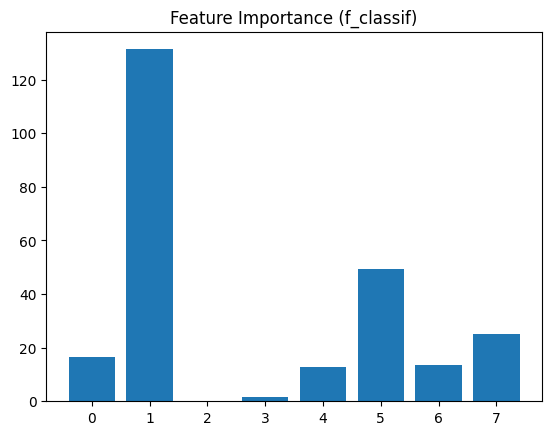

In [7]:
# example of anova f-test feature selection for numerical data 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    # format all fields as string
    X = X.astype(str) 
    return X, y

    # Feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    # Transform into DataFrames
    X_train_fs = pd.DataFrame(fs.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_fs = pd.DataFrame(fs.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_fs, X_test_fs, fs

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# Print scores for features
for col, score in zip(X_train_fs.columns, fs.scores_):
    print(f'Feature: {col}, Score: {score:.4f}')

# Plot
# plt.figure(figsize=(10, 5))
plt.bar(X_train_fs.columns, fs.scores_)
# plt.xticks(rotation=45)
plt.title("Feature Importance (f_classif)")
# plt.tight_layout()
plt.show()

### Mutual Information (mutual_info_classif)

✅ **Mutual Information (mutual_info_classif)**<br>
- Based on information theory (reduction in uncertainty).
- **Captures non-linear relationships**.
- Also used with SelectKBest.
- Scores may differ from ANOVA F-test → different important features may be selected.

Feature: 0, Score: 0.0195
Feature: 1, Score: 0.1060
Feature: 2, Score: 0.0416
Feature: 3, Score: 0.0095
Feature: 4, Score: 0.0489
Feature: 5, Score: 0.0779
Feature: 6, Score: 0.0231
Feature: 7, Score: 0.0663


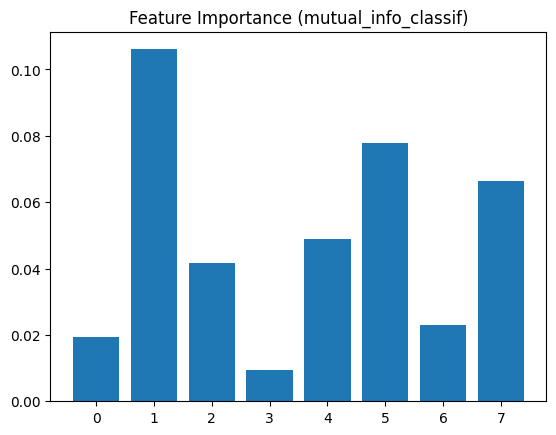

In [8]:
# example of anova f-test feature selection for numerical data 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    # format all fields as string
    X = X.astype(str) 
    return X, y

    # Feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    
    # Transform into DataFrames
    X_train_fs = pd.DataFrame(fs.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_fs = pd.DataFrame(fs.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train_fs, X_test_fs, fs

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# Print scores for features
for col, score in zip(X_train_fs.columns, fs.scores_):
    print(f'Feature: {col}, Score: {score:.4f}')

# Plot
# plt.figure(figsize=(10, 5))
plt.bar(X_train_fs.columns, fs.scores_)
# plt.xticks(rotation=45)
plt.title("Feature Importance (mutual_info_classif)")
# plt.tight_layout()
plt.show()

### Modeling With Selected Features - Model Built Using All Features

In [9]:
#evaluation of a model using all input features 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


### Modeling With Selected Features - Model Built Using ANOVA F-test Features

In [10]:
# evaluation of a model using 4 features chosen with anova f-test 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k=4) 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs
    
# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


### Modeling With Selected Features - Model Built Using Mutual Information Features

In [11]:
# evaluation of a model using 4 features chosen with anova f-test 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif,mutual_info_classif
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k=4) 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs
    
# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


### Tune the Number of Selected Features

**Tuning Number of Features (k)**
- Use Grid Search + Cross-Validation to optimize k.
- Scikit-learn tools:<br>
o	**SelectKBest**<br>
o	**epeatedStratifiedKFold**<br>
o	**Pipeline**<br>
- Evaluate model for k = 1 to 8 features.
- Best accuracy (~77%) with 7 features.
- Use **boxplots** to visualize performance trends across different k.

In [12]:
# compare different numbers of features selected using anova f-test 
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

    
# define dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear') 
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)]) 

# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])] 

# define the grid search
search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=cv) 

# perform the search
results = search.fit(X, y) 

# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_) 
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 5}


We might want to see the relationship between the number of selected features and clas- sification accuracy. In this relationship, we may expect that more features result in a better performance to a point. This relationship can be explored by manually evaluating each con- figuration of k for the SelectKBest from 1 to 8, gathering the sample of accuracy scores, and plotting the results using box and whisker plots side-by-side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the classification accuracy of the pipeline. The complete example of achieving this is listed below.

>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


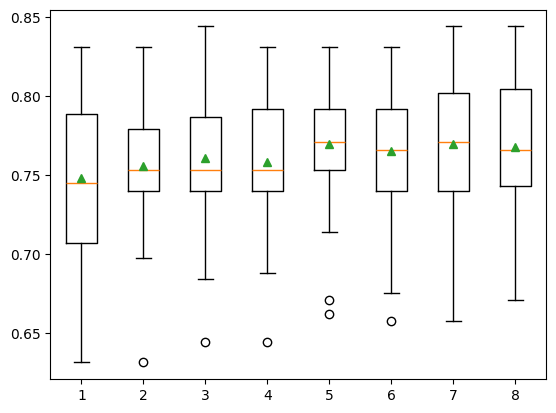

In [13]:
# compare different numbers of features selected using anova f-test 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Load the dataset as a pandas DataFrame
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

# evaluate a given model using cross-validation 
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# define number of features to evaluate 
num_features = [i+1 for i in range(X.shape[1])] 

# enumerate each number of features
results = list()

for k in num_features:
    # create pipeline
    model = LogisticRegression(solver='liblinear') 
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)]) 
    # evaluate the model
    scores = evaluate_model(pipeline) 
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)'  % (k, mean(scores),  std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=num_features, showmeans=True) 
pyplot.show()


✅ **Key Takeaways**
- **Understand your dataset**: Load, split, and prepare properly.
- **Use multiple selection methods** (ANOVA & MI) for comparison.
- **Evaluate impact** of feature selection on model performance.
- **Tune feature count** systematically (Grid Search).
- **Visual tools (bar charts, boxplots)** help interpret feature importance and model results.

## How to Select Features for Numerical Output

🎯 **Objective**<br>
Perform feature selection for numerical inputs in regression tasks.

🧠 **Key Takeaways**
- Understand **feature importance** using **correlation** and **mutual information**.
- Apply **feature selection** to improve model accuracy.
- Use **grid search** to find the optimal number of features.

**Numerical Feature Selection Methods**<br><br>
📈 **Correlation Statistics**<br>
- Measures linear relationships (Pearson’s r).
- **Values range from -1 to 1 (converted to positive for ranking).**
- Use:<br>
o	**f_regression()** + **SelectKBest** in scikit-learn.<br>
- Plot feature scores to visually select top k features.
- Example: Top 10 features had highest correlation.<br><br>
🔐 **Mutual Information Statistics**<br>
- Measures dependency (information gain).
- Works with both discrete and continuous variables.
- Use:<br>
o	**mutual_info_regression()** + **SelectKBest**.<br>
- Often identifies more relevant features than correlation due to noise tolerance.
- Visualize importance with bar plots.

#### Correlation Feature Selection

📈 **Correlation Statistics**<br>
- Measures linear relationships (Pearson’s r).
- **Values range from -1 to 1 (converted to positive for ranking).**
- Use:<br>
o	**f_regression()** + **SelectKBest** in scikit-learn.<br>
- Plot feature scores to visually select top k features.
- Example: Top 10 features had highest correlation.<br><br>

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

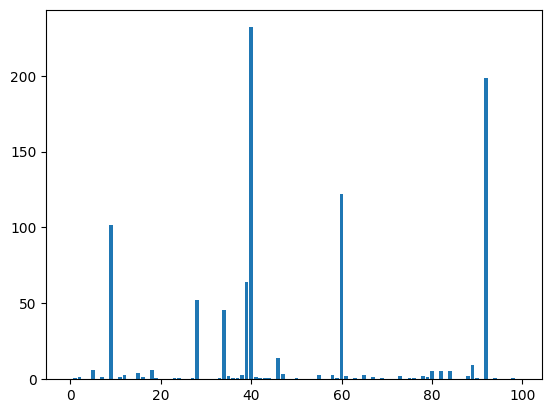

In [14]:
# example of correlation feature selection for numerical data 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Mutual Information Feature Selection

🔐 **Mutual Information Statistics**<br>
- Measures dependency (information gain).
- Works with both discrete and continuous variables.
- Use:<br>
o	**mutual_info_regression()** + **SelectKBest**.<br>
- Often identifies more relevant features than correlation due to noise tolerance.
- Visualize importance with bar plots.

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

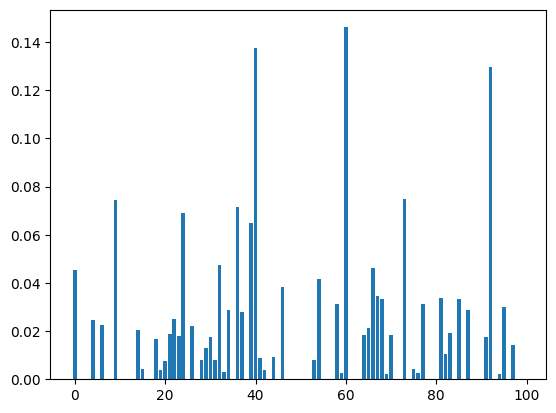

In [15]:
# example of mutual information feature selection for numerical input data 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all') 
    # learn relationship from training data
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()

#### Modeling With Selected Features - Model Built Using All Features

In [16]:
# evaluation of a model using all input features 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model
model = LinearRegression() 
model.fit(X_train,  y_train) 

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.086


#### Modeling With Selected Features - Model Built Using Correlation Features

In [17]:
# evaluation of a model using 10 features chosen with correlation 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=10) 
    # learn relationship from training data 
    fs.fit(X_train,  y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LinearRegression() 
model.fit(X_train_fs,  y_train) 

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)


MAE: 2.740


In [18]:
# evaluation of a model using 88 features chosen with correlation 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=88) 
    # learn relationship from training data 
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LinearRegression() 
model.fit(X_train_fs,  y_train) 

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.085


#### Modeling With Selected Features - Model Built Using Mutual Information Features

In [19]:
# evaluation of a model using 88 features chosen with mutual information 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88) 
    # learn relationship from training data
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LinearRegression()
model.fit(X_train_fs,  y_train) 

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.084


#### Tune the Number of Selected Features

In [20]:
# compare different numbers of features selected using mutual information 
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 

# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression) 
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)]) 

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)] 

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search 
results = search.fit(X, y) 

# summarize best
print('Best MAE: %.3f' % results.best_score_) 
print('Best Config: %s' % results.best_params_) 

# summarize all
means = results.cv_results_['mean_test_score'] 
params = results.cv_results_['params']
for mean, param in zip(means, params): 
    print('>%.3f with: %r' % (mean, param))

Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with: {'sel__k': 80}
>-0.082 with: {'sel__k': 81}
>-0.082 with: {'sel__k': 82}
>-0.082 with: {'sel__k': 83}
>-0.082 with: {'sel__k': 84}
>-0.082 with: {'sel__k': 85}
>-0.082 with: {'sel__k': 86}
>-0.082 with: {'sel__k': 87}
>-0.082 with: {'sel__k': 88}
>-0.083 with: {'sel__k': 89}
>-0.083 with: {'sel__k': 90}
>-0.083 with: {'sel__k': 91}
>-0.083 with: {'sel__k': 92}
>-0.083 with: {'sel__k': 93}
>-0.083 with: {'sel__k': 94}
>-0.083 with: {'sel__k': 95}
>-0.083 with: {'sel__k': 96}
>-0.083 with: {'sel__k': 97}
>-0.083 with: {'sel__k': 98}
>-0.083 with: {'sel__k': 99}
>-0.083 with: {'sel__k': 100}


We might want to see the relationship between the number of selected features and MAE. In this relationship, we may expect that more features result in better performance, to a point. This relationship can be explored by manually evaluating each configuration of k for the SelectKBest from 81 to 100, gathering the sample of MAE scores, and plotting the results using box and whisker plots side by side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the MAE of the pipeline. Note that we started the spread of k values at 81 instead of 80 because the distribution of MAE scores for k=80 is dramatically larger than all other values of k considered and it washed out the plot of the results on the graph. The complete example of achieving this is listed below.

>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


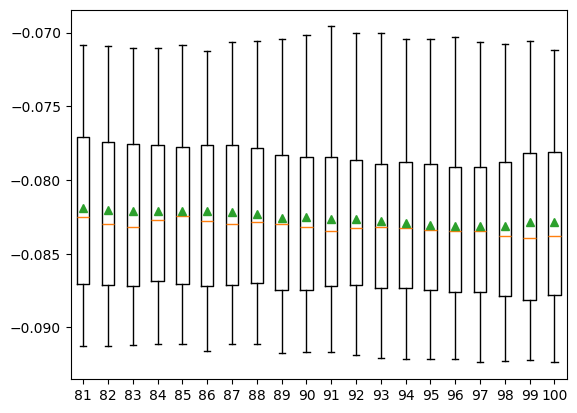

In [21]:
#compare different numbers of features selected using mutual information 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)] 

# enumerate each number of features
results = list()

for k in num_features:
    # create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k) 
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    
    # evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)  

    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores))) 
    
# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=num_features, showmeans=True) 
pyplot.show()


📚 **Summary: Essential Skills Gained**
- Use **correlation** and **mutual information** to rank features.
- Apply **SelectKBest** to reduce dimensionality.
- **Benchmark model performance** before and after selection.
- Use **grid search and cross-validation** to fine-tune k.
- Visualize results for interpretability and insight.

## How to Use RFE for Feature Selection

📌 **Overview of RFE (Recursive Feature Elimination)**
- Efficient wrapper-based feature selection method.
- Iteratively removes less important features based on model performance.
- Helps reduce dimensionality and improve model effectiveness.

🧠 **Key Concepts**
- **Feature Selection**: Choose relevant features to improve learning and reduce overfitting.
- **Wrapper Method**: Uses a machine learning model to evaluate feature importance (unlike filter methods).
- **Recursive Process**: Fit model → Rank features → Eliminate least important → Repeat.

🛠️ **RFE with Scikit-learn**<br>
- Use RFE class from sklearn.feature_selection.
- **Key parameters**:<br>
o	estimator: Base model (e.g., decision tree, logistic regression).<br>
o	n_features_to_select: Number of features to keep.<br>
- **Workflow**:<br>
o	fit() on training data.<br>
o	transform() to apply to data.<br>
o	support_: Boolean array of selected features.<br>
o	ranking_: Feature importance ranks.


🧪 **Applications**<br>
**Classification**
- Use make_classification() for synthetic data.
- RFE + DecisionTreeClassifier
- Evaluate with **stratified k-fold cross-validation** (e.g., 3 repeats × 10 folds).
- Final model pipeline can be used for predictions.<br><br>
**Regression**
- Use make_regression() for synthetic data.
- RFE + DecisionTreeRegressor
- Evaluate with **repeated k-fold cross-validation**, measure using **Mean Absolute Error (MAE)**.
- Lower (less negative) MAE = better performance.

⚙️ **RFE Hyperparameters to Tune**<br><br>
**Number of Features**
- Experiment with values (e.g., 2 to 10).
- Performance usually peaks near number of informative features.
- Visualize with box plots to observe trends.<br><br>
**Automatic Feature Selection**
- Use RFECV to automatically find optimal number of features.
- Configurable with:<br>
o	estimator, cv, scoring, min_features_to_select.

🔍 **Interpreting Results**
- **support_**: Tells you which features were selected (True/False).
- **ranking_**: Shows relative importance ranks (1 = best).

🔄 **Explore Different Base Models**<br>
- Different base models yield different selected features.
- Try models like:<br>
o	Logistic Regression<br>
o	Decision Trees (CART)<br>
o	Gradient Boosted Machines (GBM)<br>
o	Perceptron<br>
- Some models (e.g., linear) may offer better feature selection than tree-based ones.

🧾 **Takeaways**
- RFE is powerful, flexible, and integrates well with pipelines.
- Crucial for improving model accuracy and reducing computation.
- Use cross-validation and visualizations to guide decisions on feature count and base model.

#### RFE for Classification

**Classification**
- Use make_classification() for synthetic data.
- RFE + DecisionTreeClassifier
- Evaluate with **stratified k-fold cross-validation** (e.g., 3 repeats × 10 folds).
- Final model pipeline can be used for predictions.<br><br>

In [22]:
# evaluate RFE for classification 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
model = DecisionTreeClassifier()
pipeline    =    Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.035)


We can also use the RFE model pipeline as a final model and make predictions for classifica- tion. First, the RFE and model are fit on all available data, then the predict() function can be called to make predictions on new data. The example below demonstrates this on our binary classification dataset.

In [23]:
# make a prediction with an RFE pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)]) 

# fit the model on all available data 
pipeline.fit(X, y)

# make a prediction for one example
data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,-2.48924933, -1.93094078, 3.26130366, 2.05692145]]

yhat = pipeline.predict(data) 
print(f'Predicted Class: {yhat[0]}')

Predicted Class: 1


#### RFE for Regression

**Regression**
- Use make_regression() for synthetic data.
- RFE + DecisionTreeRegressor
- Evaluate with **repeated k-fold cross-validation**, measure using **Mean Absolute Error (MAE)**.
- Lower (less negative) MAE = better performance.

In [24]:
# evaluate RFE for regression 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
model = DecisionTreeRegressor()
pipeline    =    Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.183 (2.564)


We can also use the RFE as part of the final model and make predictions for regression. First, the Pipeline is fit on all available data, then the predict() function can be called to make predictions on new data. The example below demonstrates this on our regression dataset.

In [25]:
# make a regression prediction with an RFE pipeline 
from sklearn.datasets import make_regression
from  sklearn.feature_selection  import  RFE
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit the model on all available data 
pipeline.fit(X, y)

# make a prediction for one example
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381,0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data) 
print(f'Predicted Class: {round(yhat[0],3)}')

Predicted Class: -84.288


#### RFE  Hyperparameters - Explore Number of Features

**Number of Features**
- Experiment with values (e.g., 2 to 10).
- Performance usually peaks near number of informative features.
- Visualize with box plots to observe trends.<br><br>

>2 0.718 (0.041)
>3 0.823 (0.037)
>4 0.879 (0.027)
>5 0.888 (0.034)
>6 0.888 (0.030)
>7 0.889 (0.027)
>8 0.884 (0.027)
>9 0.883 (0.028)


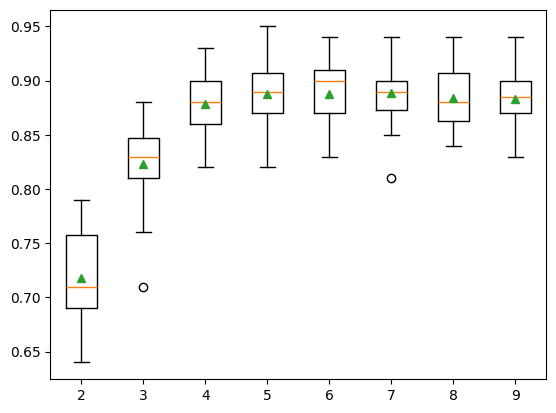

In [26]:
# explore the number of selected features for RFE 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
    
# get a list of models to evaluate 
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i) 
        model = DecisionTreeClassifier()
        models[str(i)]  =  Pipeline(steps=[('s',rfe),('m',model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores
    
# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results
results, names =  list(),  list() 

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()


#### RFE  Hyperparameters - Automatically Select the Number of Features

**Automatic Feature Selection**
- Use RFECV to automatically find optimal number of features.
- Configurable with:<br>
o	estimator, cv, scoring, min_features_to_select.

In [27]:
# automatically select the number of features for RFE 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier()) 
model = DecisionTreeClassifier()
pipeline    =    Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.887 (0.030)


#### RFE  Hyperparameters - Which Features Were Selected

🔍 **Interpreting Results**
- **support_**: Tells you which features were selected (True/False).
- **ranking_**: Shows relative importance ranks (1 = best).

In [28]:
# report which features were selected by RFE 
from sklearn.datasets import make_classification 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 

# fit RFE
rfe.fit(X, y)

# summarize all features 
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 3
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 2


#### RFE  Hyperparameters - Explore Base Algorithm

>lr 0.894 (0.034)
>per 0.848 (0.036)
>cart 0.888 (0.033)
>rf 0.857 (0.038)
>gbm 0.884 (0.030)


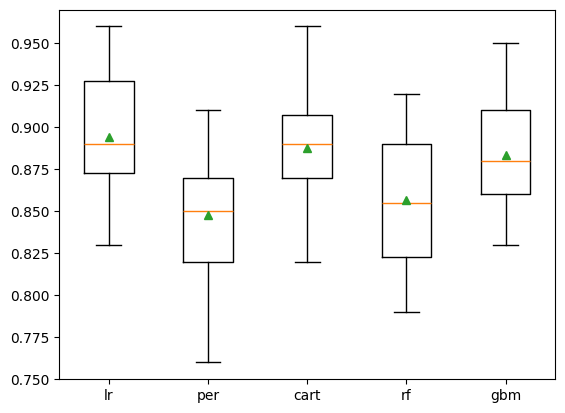

In [29]:
# explore the algorithm wrapped by RFE 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
    
# get a list of models to evaluate 
def get_models():
    models = dict() 
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['per']  =  Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['rf']  =  Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['gbm']   =   Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()

## How to Use Feature Importance

### Feature Importance – Core Concepts

🧠 **Feature Importance – Core Concepts**
- Assigns scores to input features based on their **predictive power**.
- Helps in: <br>
o   Understanding **data**.<br>
o	Interpreting **models**.<br>
o	Performing **feature selection** and **dimensionality reduction**.

🔍 **Why Feature Importance Matters**
- **Insight into Data**: Identifies relevant vs irrelevant features.
- **Insight into Model**: Reveals which features the model relies on most.
- **Improved Efficiency**: Speeds up training, improves accuracy by reducing noise.

🛠️ **Main Methods to Calculate Feature Importance**

1.	**Model Coefficients (Linear Models)**<br>
o	Applicable to:<br>
- LinearRegression, Ridge, Lasso, ElasticNet
- LogisticRegression for classification<br><br>
o	Coefficients represent **importance** (must standardize features).<br>
o	Can be **positive** or **negative** (for class-specific indication in classification).<br>

2.	**Decision Trees**<br>
o	Based on reduction in **Gini**, **entropy**, or **MSE**.<br>
o	Models:<br>
- DecisionTreeClassifier
- DecisionTreeRegressor
o	Feature importances via .feature_importances_.

3.	**Random Forests & Ensembles**<br>
o	Aggregate feature importance across many trees.<br>
o	Models:<br>
- RandomForestClassifier, RandomForestRegressor<br><br>
o	Often more **robust** than single tree models.

4.	**Permutation Importance (Model Agnostic)**<br>
o	Randomly shuffles one feature at a time and measures performance drop.<br>
o	Repeats multiple times to get **mean importance**.<br>
o	Can be used with **any model** (e.g., KNeighborsClassifier, KNeighborsRegressor).

🔄 **Feature Selection Using Importance Scores**
- **Steps**:
1.	Fit a model on training data.
2.	Compute feature importances.
3.	Use **SelectFromModel** to select top-k features.
4.	Train a final model on reduced features.
- **Result**: Similar or better performance with fewer features.

❓ **Common Questions**
- **Q: What do the scores mean?**<br>
o	Relative rankings of features within the same method.<br><br>
- **Q: How are scores used?**<br>
o	For data insight, model insight, or feature reduction.<br><br>
- **Q: Which method is best?**<br>
o	No single best method — try multiple and choose based on performance.

✅ **Takeaways**
- Feature importance is **context-dependent** and **model-specific**.
- Use **multiple methods** to compare results.
- Always **validate performance** when reducing features.

### Model Coefficients (Linear Models)

**Model Coefficients (Linear Models)**<br>
o	Applicable to:<br>
- LinearRegression, Ridge, Lasso, ElasticNet
- LogisticRegression for classification<br><br>
o	Coefficients represent **importance** (must standardize features).<br>
o	Can be **positive** or **negative** (for class-specific indication in classification).<br>


#### Coefficients as Feature Importance - Linear Regression Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


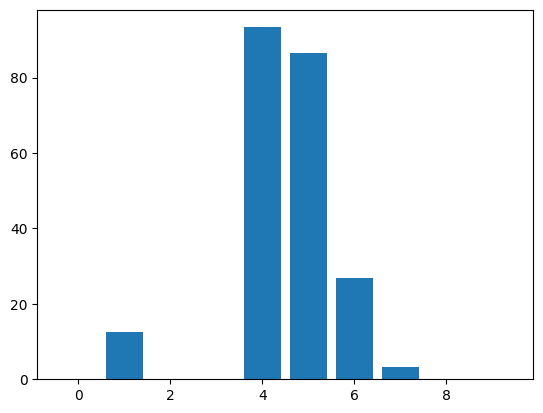

In [30]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = LinearRegression() 

# fit the model 
model.fit(X, y)

# get importance 
importance = model.coef_

# summarize feature importance 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Coefficients as Feature Importance - Logistic Regression Feature Importance

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


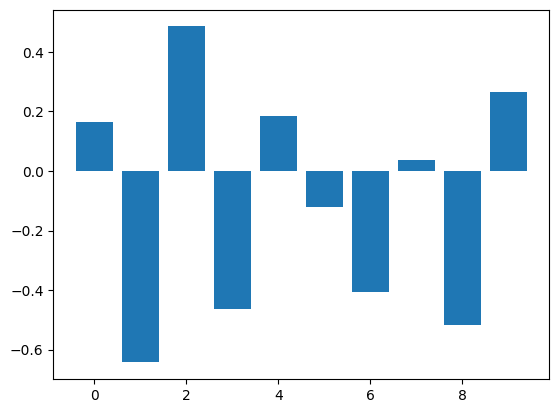

In [32]:
# logistic regression for feature importance 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = LogisticRegression() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.coef_[0]

# summarize feature importance 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Decision Trees

**Decision Trees**<br>
o	Based on reduction in **Gini**, **entropy**, or **MSE**.<br>
o	Models:<br>
- DecisionTreeClassifier
- DecisionTreeRegressor
o	Feature importances via .feature_importances_.

#### Decision Tree Feature Importance - CART Regression Feature Importance

Feature: 0, Score: 0.00265
Feature: 1, Score: 0.00440
Feature: 2, Score: 0.00173
Feature: 3, Score: 0.00189
Feature: 4, Score: 0.51767
Feature: 5, Score: 0.43830
Feature: 6, Score: 0.02675
Feature: 7, Score: 0.00253
Feature: 8, Score: 0.00232
Feature: 9, Score: 0.00175


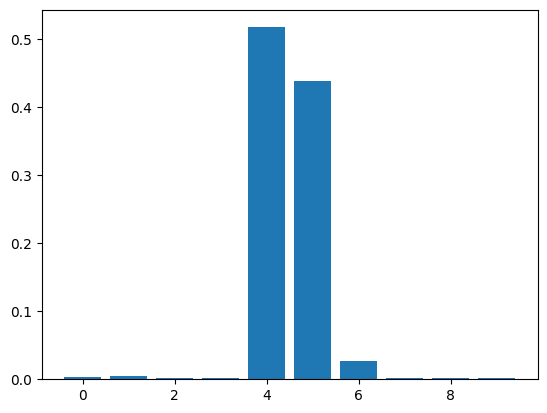

In [33]:
# decision tree for feature importance on a regression problem 
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = DecisionTreeRegressor() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Decision Tree Feature Importance - CART Classification Feature Importance

Feature: 0, Score: 0.02406
Feature: 1, Score: 0.01633
Feature: 2, Score: 0.18830
Feature: 3, Score: 0.29655
Feature: 4, Score: 0.09661
Feature: 5, Score: 0.00946
Feature: 6, Score: 0.17431
Feature: 7, Score: 0.02743
Feature: 8, Score: 0.12884
Feature: 9, Score: 0.03810


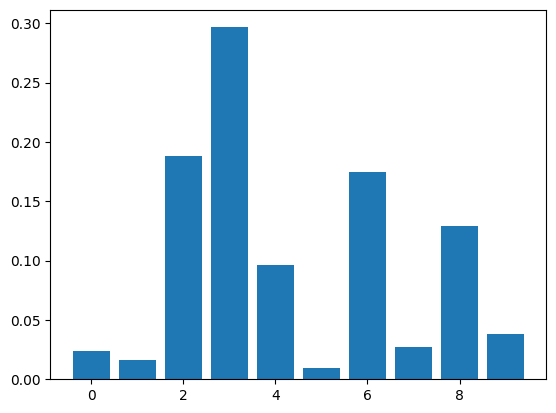

In [34]:
# decision tree for feature importance on a classification problem 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = DecisionTreeClassifier() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

### Random Forests & Ensembles

**Random Forests & Ensembles**<br>
o	Aggregate feature importance across many trees.<br>
o	Models:<br>
- RandomForestClassifier, RandomForestRegressor<br><br>
o	Often more **robust** than single tree models.

#### Random Forest Regression Feature Importance

Feature: 0, Score: 0.00304
Feature: 1, Score: 0.00511
Feature: 2, Score: 0.00261
Feature: 3, Score: 0.00274
Feature: 4, Score: 0.53078
Feature: 5, Score: 0.42040
Feature: 6, Score: 0.02685
Feature: 7, Score: 0.00289
Feature: 8, Score: 0.00291
Feature: 9, Score: 0.00267


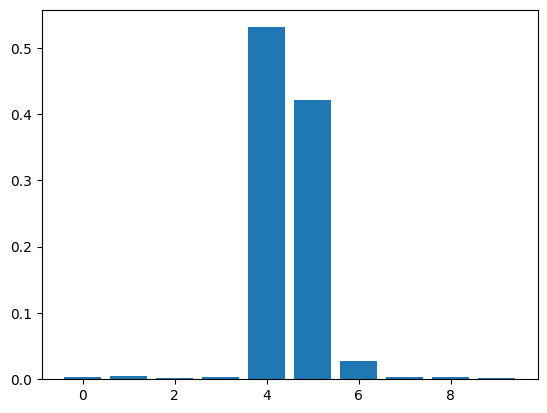

In [35]:
# random forest for feature importance on a regression problem 
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = RandomForestRegressor() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Random Forest Classification Feature Importance

Feature: 0, Score: 0.07479
Feature: 1, Score: 0.10810
Feature: 2, Score: 0.14669
Feature: 3, Score: 0.19726
Feature: 4, Score: 0.08773
Feature: 5, Score: 0.10227
Feature: 6, Score: 0.10159
Feature: 7, Score: 0.04580
Feature: 8, Score: 0.08719
Feature: 9, Score: 0.04857


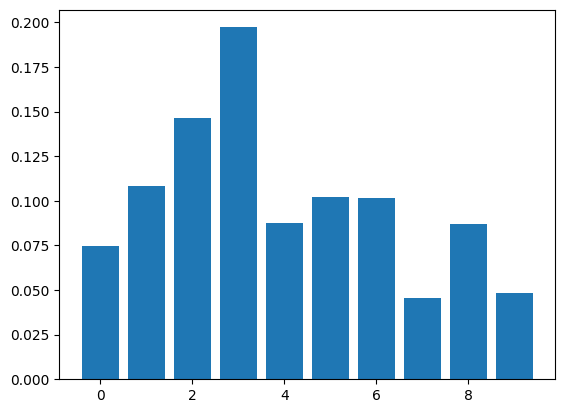

In [36]:
# random forest for feature importance on a classification problem 
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = RandomForestClassifier() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

### Permutation Importance (Model Agnostic)

**Permutation Importance (Model Agnostic)**<br>
o	Randomly shuffles one feature at a time and measures performance drop.<br>
o	Repeats multiple times to get **mean importance**.<br>
o	Can be used with **any model** (e.g., KNeighborsClassifier, KNeighborsRegressor).

#### Permutation Feature Importance for Regression

Permutation feature importance is a technique for calculating relative importance scores that is **independent** of the model used. <br><br>First, a model is fit on the dataset, such as a model that does not support native feature importance scores. <br><br>Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. <br><br>This is repeated for each feature in the dataset. <br>Then this whole process is repeated 3, 5, 10 or more times. <br>The result is a **mean importance score for each input feature** (and distribution of scores given the repeats).

Feature: 0, Score: 200.18447
Feature: 1, Score: 362.02671
Feature: 2, Score: 156.24518
Feature: 3, Score: 111.38527
Feature: 4, Score: 9747.76063
Feature: 5, Score: 7796.65502
Feature: 6, Score: 987.21041
Feature: 7, Score: 149.16260
Feature: 8, Score: 118.21104
Feature: 9, Score: 104.32242


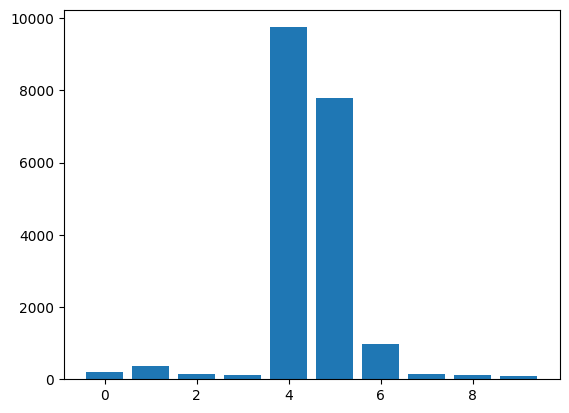

In [37]:
# permutation feature importance with knn for regression 
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.inspection import permutation_importance 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = KNeighborsRegressor() 

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error') 

# get importance
importance = results.importances_mean 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Permutation Feature Importance for Classification

Feature: 0, Score: 0.05080
Feature: 1, Score: 0.06740
Feature: 2, Score: 0.05380
Feature: 3, Score: 0.08700
Feature: 4, Score: 0.05140
Feature: 5, Score: 0.05700
Feature: 6, Score: 0.07600
Feature: 7, Score: 0.05360
Feature: 8, Score: 0.05540
Feature: 9, Score: 0.02940


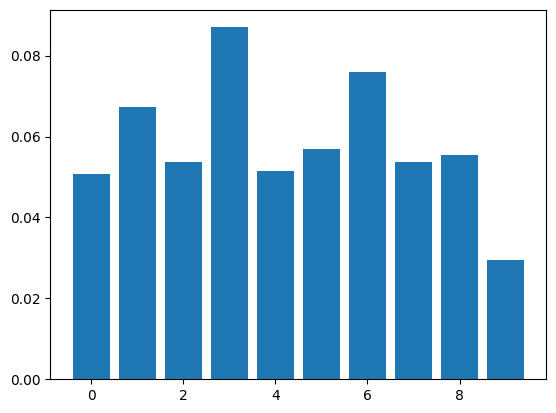

In [38]:
# permutation feature importance with knn for classification 
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.inspection import permutation_importance 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = KNeighborsClassifier() 

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy') 

# get importance
importance = results.importances_mean 

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

### Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model. <br>We can demonstrate this with a small example. <br>Recall, our synthetic dataset has 1,000 examples each with 10 input variables, five of which are redundant and five of which are important to the outcome. <br>We can use feature importance scores to help select the five variables that are relevant and only use them as inputs to a predictive model.

#### Feature Selection with Importance - Example of evaluating a model with all selected features.

First, we can split the training dataset into train and test sets and train a model on the training dataset, make predictions on the test set and evaluate the result using classification accuracy. <br>We will use a logistic regression model as the predictive model. <br>This **provides a baseline for comparison** when we remove some features using feature importance scores. <br>The complete example of evaluating a logistic regression model using **all features** as input on our synthetic dataset is listed below.

In [39]:
# evaluation of a model using all features
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# fit the model
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


#### Feature Selection with Importance - Example of evaluating a model with feature selection performed using feature importance.

Given that we created the dataset to have 5 informative features, we would expect better or the same results with half the number of input variables. <br>**We could use any of the feature importance scores explored above**, but in this case we will use the feature importance scores provided by random forest. <br>We can use the **SelectFromModel class** to define both the model we wish to calculate importance scores, RandomForestClassifier in this case, and the number of features to select, 5 in this case.

In [40]:
#evaluation of a model using 5 features chosen with random forest importance 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5) 
    # learn relationship from training data
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LogisticRegression(solver='liblinear') 
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In this case, we can see that the model achieves the **same performance on the dataset**, **although with half the number of input features**. <br>As expected, the feature importance scores calculated by random forest allowed us **to accurately rank the input features** and **delete those that were not relevant to the target variable**.